DATA PRE-PROCESSING

Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



Reading the dataset


In [45]:
data=pd.read_csv("indian_liver_patient.csv")



Exploratory data analysis and Data visualization

In [44]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [48]:
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


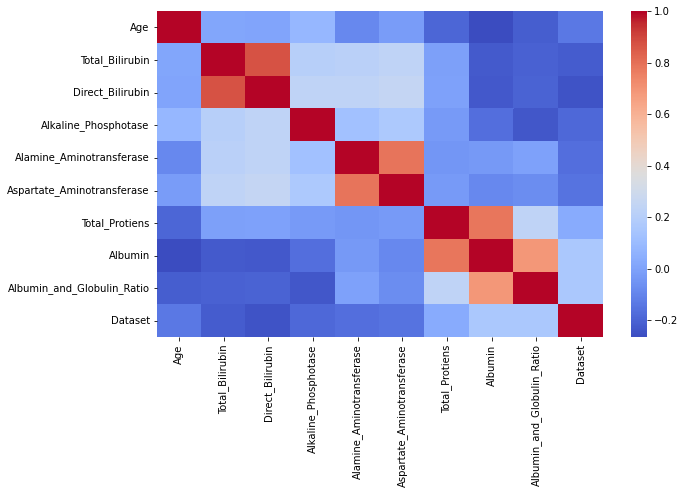

In [21]:
fig=plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),cmap='coolwarm')

In [23]:
diseased=data[data['Dataset']==1]
diseased

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
576,32,Male,15.0,8.2,289,58,80,5.3,2.2,0.70,1
577,32,Male,12.7,8.4,190,28,47,5.4,2.6,0.90,1
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


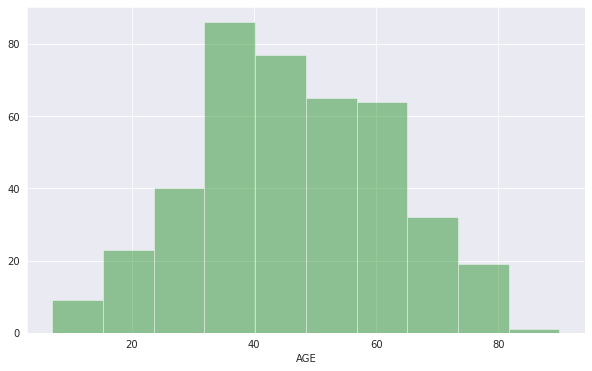

In [24]:
sns.set_style('darkgrid')
fig=plt.figure(figsize=(10,6))
sns.distplot(diseased['Age'],bins=10,kde=False,axlabel='AGE',color='green')


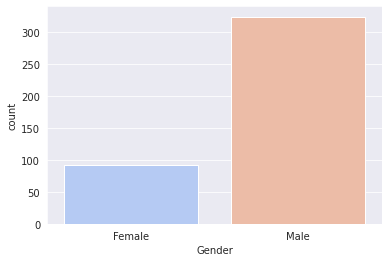

In [25]:
sns.countplot(x='Gender',data=diseased,palette='coolwarm')

In [26]:
for i in range(583):
    if data.iloc[i,10]==2:
        data.iloc[i,10]=0

In [27]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [33]:
data['Gender'].value_counts()

0    441
1    142
Name: Gender, dtype: int64

In [39]:
df = pd.get_dummies(data, columns = ['Gender'])
print(df)

     Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65              0.7               0.1                   187   
1     62             10.9               5.5                   699   
2     62              7.3               4.1                   490   
3     58              1.0               0.4                   182   
4     72              3.9               2.0                   195   
..   ...              ...               ...                   ...   
578   60              0.5               0.1                   500   
579   40              0.6               0.1                    98   
580   52              0.8               0.2                   245   
581   31              1.3               0.5                   184   
582   38              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                          16                          18             6.8   
1                

Checking for null values and handling null values and Scaling

In [40]:
for i in range(11):
    print(sum(df.iloc[:,i].isnull())) 

0
0
0
0
0
0
0
0
4
0
0


In [41]:
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(),inplace=True)
sum(df['Albumin_and_Globulin_Ratio'].isnull())

0

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Dataset',axis=1))
scaled_features = scaler.transform(df.drop('Dataset',axis=1))
liver_scaled = pd.DataFrame(scaled_features,columns=df.columns[:-1])
liver_scaled.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_0
0,1.252098,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.147898,-1.762281,1.762281
1,1.066637,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.650697,0.567446,-0.567446
2,1.066637,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.179323,0.567446,-0.567446
3,0.819356,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.166351,0.567446,-0.567446
4,1.684839,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.719144,0.567446,-0.567446


Splitting the dataset into independent and dependent variable

In [43]:
X=liver_scaled
y=df['Dataset']

Splitting the independent and dependent features into train and test set

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score,mean_absolute_error,mean_squared_error
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
y_test.value_counts()

1    126
0     49
Name: Dataset, dtype: int64

MODEL BUILDING

Train and test the model using classification algorithms,
Model Evaluation,
Save the model

SUPPORT VECTOR MACHINE

In [50]:
from sklearn.svm import SVC

In [51]:
model=SVC()

In [83]:
param_grid = {'C': [0.1,1, 10,50,100,200,1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.707 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.707 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.707 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.707 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.707 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.707 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.707 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 50, 100, 200, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [54]:
svm_predictions=grid.predict(X_test)

In [55]:
from sklearn.metrics import classification_report,confusion_matrix

In [56]:
svm_acc=accuracy_score(y_test,svm_predictions)
svm_prec=precision_score(y_test,svm_predictions)
svm_rec=recall_score(y_test,svm_predictions)
svm_f1=f1_score(y_test,svm_predictions)
svm_mas=mean_absolute_error(y_test,svm_predictions)
svm_rms=np.sqrt(mean_squared_error(y_test,svm_predictions))

In [57]:
print(classification_report(y_test,svm_predictions))

              precision    recall  f1-score   support

           0       0.37      0.20      0.26        49
           1       0.74      0.87      0.80       126

    accuracy                           0.68       175
   macro avg       0.55      0.53      0.53       175
weighted avg       0.63      0.68      0.65       175



LOGISTIC REGRESSION

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
lg=LogisticRegression()

In [60]:
lg.fit(X_train,y_train)

LogisticRegression()

In [61]:
lg_predictions=lg.predict(X_test)

In [62]:
lg_acc=accuracy_score(y_test,lg_predictions)
lg_prec=precision_score(y_test,lg_predictions)
lg_rec=recall_score(y_test,lg_predictions)
lg_f1=f1_score(y_test,lg_predictions)
lg_mas=mean_absolute_error(y_test,lg_predictions)
lg_rms=np.sqrt(mean_squared_error(y_test,lg_predictions))

In [63]:
print(classification_report(y_test,lg_predictions))

              precision    recall  f1-score   support

           0       0.65      0.22      0.33        49
           1       0.76      0.95      0.85       126

    accuracy                           0.75       175
   macro avg       0.70      0.59      0.59       175
weighted avg       0.73      0.75      0.70       175



RANDOM FOREST CLASSIFIER

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rfc= RandomForestClassifier(n_estimators=600)

In [66]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [67]:
rfc_predictions=rfc.predict(X_test)

In [68]:
rfc_acc=accuracy_score(y_test,rfc_predictions)
rfc_prec=precision_score(y_test,rfc_predictions)
rfc_rec=recall_score(y_test,rfc_predictions)
rfc_f1=f1_score(y_test,rfc_predictions)
rfc_mas=mean_absolute_error(y_test,rfc_predictions)
rfc_rms=np.sqrt(mean_squared_error(y_test,rfc_predictions))

In [69]:
print(classification_report(y_test,rfc_predictions))

              precision    recall  f1-score   support

           0       0.48      0.33      0.39        49
           1       0.77      0.87      0.81       126

    accuracy                           0.71       175
   macro avg       0.63      0.60      0.60       175
weighted avg       0.69      0.71      0.69       175



DECISION TREE CLASSIFIER ALGORITHM

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
dtree=DecisionTreeClassifier()

In [72]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [73]:
dtree_predictions=dtree.predict(X_test)

In [74]:
dtree_acc=accuracy_score(y_test,dtree_predictions)
dtree_prec=precision_score(y_test,dtree_predictions)
dtree_rec=recall_score(y_test,dtree_predictions)
dtree_f1=f1_score(y_test,dtree_predictions)
dtree_mas=mean_absolute_error(y_test,dtree_predictions)
dtree_rms=np.sqrt(mean_squared_error(y_test,dtree_predictions))

In [75]:
print(classification_report(y_test,dtree_predictions))

              precision    recall  f1-score   support

           0       0.41      0.45      0.43        49
           1       0.78      0.75      0.76       126

    accuracy                           0.66       175
   macro avg       0.59      0.60      0.59       175
weighted avg       0.67      0.66      0.67       175



K NEAREST NEIGHBOURS ALGORITHM



In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

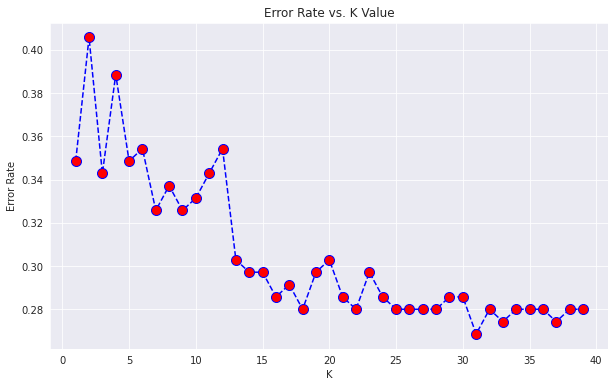

In [78]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [79]:
error_rate[36]

0.2742857142857143

In [80]:
knn = KNeighborsClassifier(n_neighbors=36)

knn.fit(X_train,y_train)
knn_predictions = knn.predict(X_test)

print('WITH K=36')
print('\n')
print(classification_report(y_test,knn_predictions))

WITH K=36


              precision    recall  f1-score   support

           0       0.50      0.16      0.25        49
           1       0.74      0.94      0.83       126

    accuracy                           0.72       175
   macro avg       0.62      0.55      0.54       175
weighted avg       0.67      0.72      0.67       175



In [82]:
knn_acc=accuracy_score(y_test,knn_predictions)
knn_prec=precision_score(y_test,knn_predictions)
knn_rec=recall_score(y_test,knn_predictions)
knn_f1=f1_score(y_test,knn_predictions)
knn_mas=mean_absolute_error(y_test,knn_predictions)
knn_rms=np.sqrt(mean_squared_error(y_test,knn_predictions))

Analyzing the different machine learning models

In [85]:
d={'Machine Learning Algorithm':['Support Vector Machine','Logistic Regression','Random Forest Classifier','Decision Tree Classifier','K Nearest Neighbours'],'Accuracy_Score':[svm_acc*100,lg_acc*100,rfc_acc*100,dtree_acc*100,knn_acc*100],'Precision_Score':[svm_prec*100,lg_prec*100,rfc_prec*100,dtree_prec*100,knn_prec*100],'Recall_Score':[svm_rec*100,lg_rec*100,rfc_rec*100,dtree_rec*100,knn_rec*100],'F1_Score':[svm_f1*100,lg_f1*100,rfc_f1*100,dtree_f1*100,knn_f1*100],'Mean_Absolute_Error':[svm_mas*100,lg_mas*100,rfc_mas*100,dtree_mas*100,knn_mas*100],'Root_Mean_Square_Error':[svm_rms*100,lg_rms*100,rfc_rms*100,dtree_rms*100,knn_rms*100]}


In [86]:
results=pd.DataFrame(d)


In [87]:
results

,Machine Learning Algorithm,Accuracy_Score,Precision_Score,Recall_Score,F1_Score,Mean_Absolute_Error,Root_Mean_Square_Error
0,Support Vector Machine,68.000000,73.648649,86.507937,79.562044,32.000000,56.568542
1,Logistic Regression,74.857143,75.949367,95.238095,84.507042,25.142857,50.142654
2,Random Forest Classifier,71.428571,76.760563,86.507937,81.343284,28.571429,53.452248
3,Decision Tree Classifier,66.285714,77.685950,74.603175,76.113360,33.714286,58.064004
4,K Nearest Neighbours,72.000000,74.213836,93.650794,82.807018,28.000000,52.915026


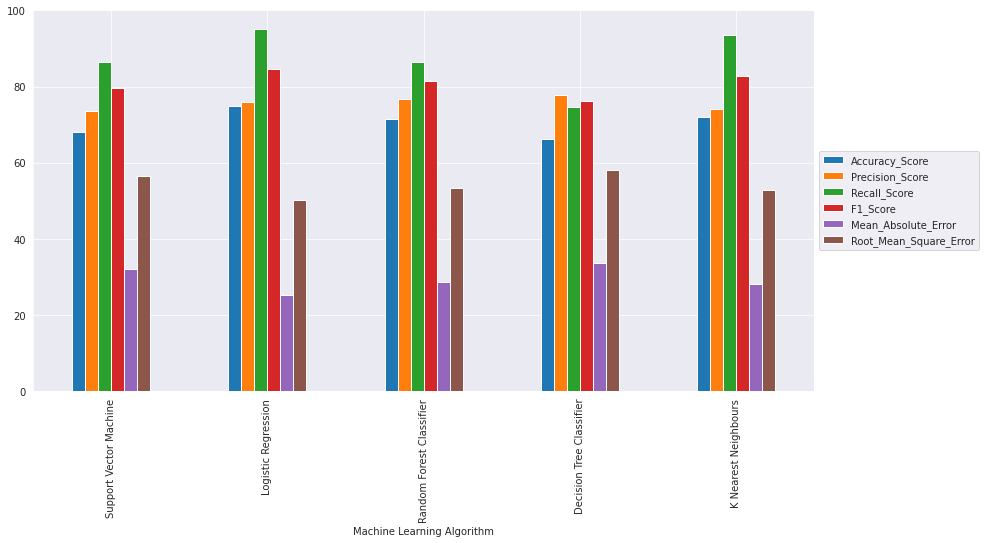

In [88]:
results.plot.bar(x='Machine Learning Algorithm',figsize=(14,7))
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))